# [Exercise 5](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Exercises/E05_KNN.ipynb)

In [54]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## 0

### a)

In [19]:
(X_train_raw, y_train_raw), (X_test_raw, y_test_raw) = keras.datasets.mnist.load_data()

### b)

The shape means that we have 60000 samples and that we work in 2 dimensions where each dimension has 28 parameters

In [20]:
X_train_raw.shape, y_train_raw.shape

((60000, 28, 28), (60000,))

### c)

60000

### d)

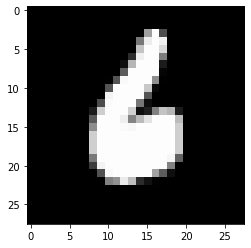

In [21]:
plt.imshow(X_train_raw[1337], cmap='gray')

The min and max value is 0 for black pixel and 255 for white pixel, values in between are 254 shades of gray

In [22]:
print(X_train_raw[1337].min(), X_train_raw[1337].max())

0 255


### e)

C:\Users\CreativeZone2\AppData\Local\Temp\ipykernel_12484\508968464.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''])
C:\Users\CreativeZone2\AppData\Local\Temp\ipykernel_12484\508968464.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''])


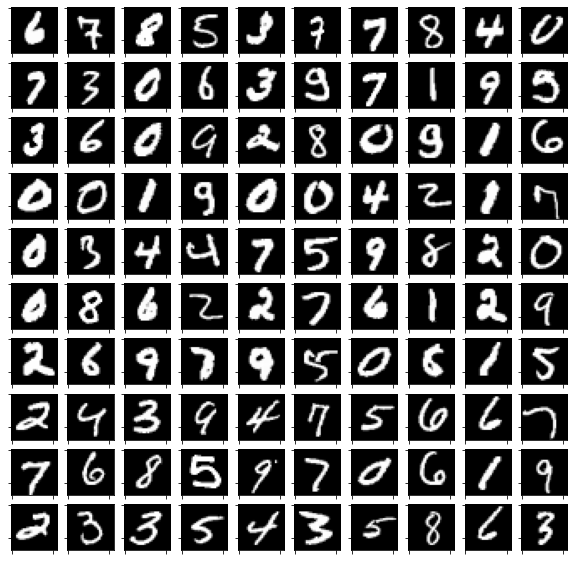

In [26]:
fig, axes = plt.subplots(10,10, figsize=(10,10))

for index, ax in enumerate(axes.ravel()):
    ax.imshow(X_train_raw[index + 1337], cmap='gray')
    ax.set_xticklabels([''])
    ax.set_yticklabels([''])

### f)

In [25]:
X_train_reshaped, X_test_reshaped = X_train_raw.reshape(-1, 28*28), X_test_raw.reshape(-1, 28*28)
X_train_reshaped.shape, X_test_reshaped.shape

((60000, 784), (10000, 784))

## 1

In [40]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_reshaped, y_train_raw, test_size=0.16, random_state=42)
X_train.shape, X_validate.shape, y_train.shape, y_validate.shape

((50400, 784), (9600, 784), (50400,), (9600,))

## 2

In [41]:
scaler = MinMaxScaler()
scaled_X_train, scaled_X_validate = scaler.fit_transform(X_train), scaler.transform(X_validate)

In [46]:
K_value_scores = []
for K_value in range(1,11):
    model_KNN = KNeighborsClassifier(n_neighbors=K_value)
    model_KNN.fit(scaled_X_train, y_train)
    y_pred = model_KNN.predict(scaled_X_validate)
    K_value_scores.append(accuracy_score(y_validate, y_pred))

[Text(0.5, 1.0, 'Validation accuracy for different k in KNN'),
 Text(0.5, 0, 'Number of neighbors'),
 Text(0, 0.5, 'Accuracy score')]

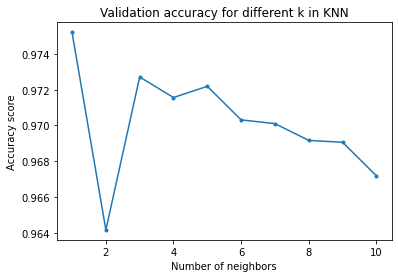

In [47]:
fig, ax = plt.figure(), plt.axes()
ax.plot(range(1, len(K_value_scores)+1), K_value_scores, '.-')
ax.set(title='Validation accuracy for different k in KNN', xlabel='Number of neighbors', ylabel='Accuracy score')

## 3

In [53]:
scaled_X_train, scaled_X_test = scaler.fit_transform(X_train_reshaped), scaler.transform(X_test_reshaped)
KNN_model = KNeighborsClassifier(n_neighbors=1)
KNN_model.fit(scaled_X_train, y_train_raw)
y_pred = KNN_model.predict(scaled_X_test)

### a)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



(10000,)

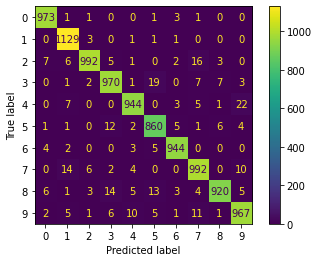

In [56]:
print(classification_report(y_test_raw, y_pred))
cm = confusion_matrix(y_test_raw, y_pred)
ConfusionMatrixDisplay(cm).plot()
y_test_raw.shape

In [75]:
for index,number_row in enumerate(cm):
    print(f'True label {index} was missclassified {sum(number_row) - number_row[index]} times')

True label 0 was missclassified 7 times
True label 1 was missclassified 6 times
True label 2 was missclassified 40 times
True label 3 was missclassified 40 times
True label 4 was missclassified 38 times
True label 5 was missclassified 32 times
True label 6 was missclassified 14 times
True label 7 was missclassified 36 times
True label 8 was missclassified 54 times
True label 9 was missclassified 42 times
